In [3]:
%pylab inline

import pandas as pd
import seaborn as sns


Populating the interactive namespace from numpy and matplotlib


In [24]:
drugtrials = pd.read_json('drugtrials.json')

In [25]:
drugtrials.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110693 entries, NCT00000102 to NCT03267836
Data columns (total 11 columns):
cond_mesh             110693 non-null object
conditions            110693 non-null object
drugs                 110693 non-null object
firstreceived_date    110693 non-null int64
int_mesh              110693 non-null object
nconditions           110693 non-null int64
ndrugs                110693 non-null int64
ninterventions        110693 non-null int64
overall_status        110693 non-null object
phase                 99076 non-null object
study_type            110693 non-null object
dtypes: int64(4), object(7)
memory usage: 10.1+ MB


In [45]:
def unique_terms(series)  :
    unique = set()
    for things in series :
        for thing in things : 
            unique.add(thing)
    return unique

def nunique_terms(series) :
    return len(unique_terms(series))

In [38]:
nconds = len(unique_terms(drugtrials.cond_mesh))
ndrugs = len(unique_terms(drugtrials.int_mesh))

print ('There are {} unique condition MeSH terms attempted by {} unique drug MeSH terms in total.'.format(nconds, ndrugs))

There are 3053 unique condition MeSH terms attempted by 2915 unique drug MeSH terms in total.


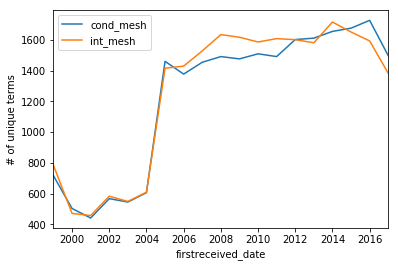

In [67]:
trials = drugtrials.groupby('firstreceived_date')
a = trials.cond_mesh.apply(nunique_terms)
b = trials.int_mesh.apply(nunique_terms)
data = pd.DataFrame([a,b]).T.plot()
ylabel('# of unique terms');

We are pulling top 10 conditions from each year and pool them together, making a set of 'popular' conditions.

In [173]:
from collections import Counter

def  top_terms(series, n=10) : 
    counts= Counter()
    
    for terms in series :
        for t in terms :
            counts[t]+=1

    conds = sorted(counts, key=counts.get, reverse=True)
    
    return conds[:n], [counts[c] for c in conds[:n]]

In [175]:
trials.cond_mesh.apply(top_terms)[2008]

(['Diabetes Mellitus',
  'Diabetes Mellitus, Type 2',
  'Syndrome',
  'Breast Neoplasms',
  'Leukemia',
  'Lung Neoplasms',
  'Disease',
  'Carcinoma, Non-Small-Cell Lung',
  'Lymphoma',
  'Hypertension'],
 [335, 252, 239, 235, 216, 203, 201, 199, 189, 188])

In [93]:
popular_conditions =  unique_terms(trials.cond_mesh.apply(top_terms))
popular_conditions

{'Acquired Immunodeficiency Syndrome',
 'Breast Neoplasms',
 'Carcinoma',
 'Carcinoma, Non-Small-Cell Lung',
 'Central Nervous System Neoplasms',
 'Colorectal Neoplasms',
 'Communicable Diseases',
 'Diabetes Mellitus',
 'Diabetes Mellitus, Type 2',
 'Disease',
 'HIV Infections',
 'Hepatitis',
 'Hepatitis C',
 'Hypertension',
 'Infection',
 'Leukemia',
 'Leukemia, Lymphoid',
 'Leukemia, Myeloid',
 'Lung Neoplasms',
 'Lymphoma',
 'Lymphoma, Non-Hodgkin',
 'Multiple Myeloma',
 'Myelodysplastic Syndromes',
 'Neoplasms',
 'Nervous System Neoplasms',
 'Pain, Postoperative',
 'Preleukemia',
 'Prostatic Neoplasms',
 'Sarcoma',
 'Schizophrenia',
 'Syndrome'}

In [113]:
for condition in popular_conditions : 
    involved = [ condition in terms for terms in drugtrials.cond_mesh ]
    drugtrials[condition]= involved
    

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


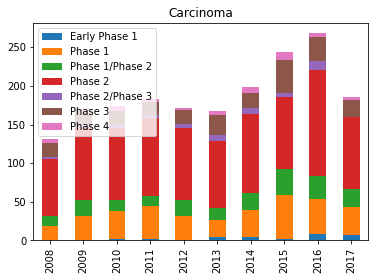

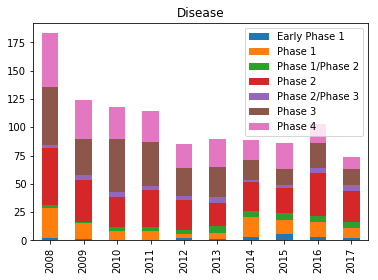

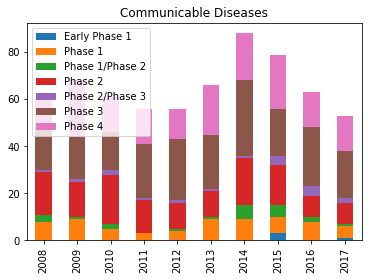

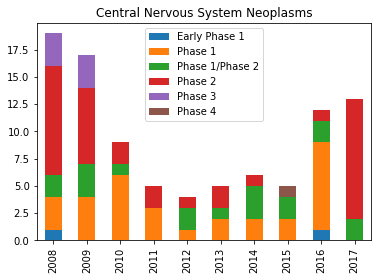

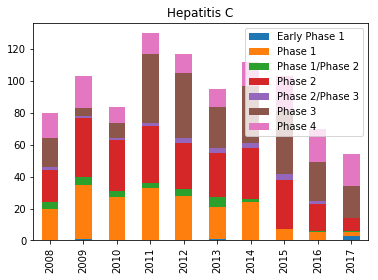

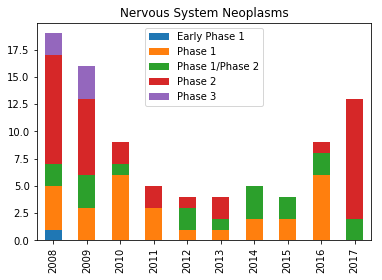

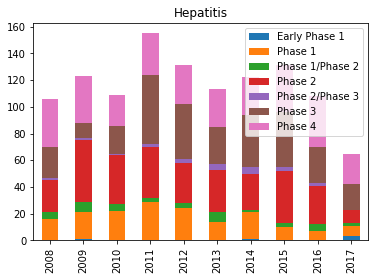

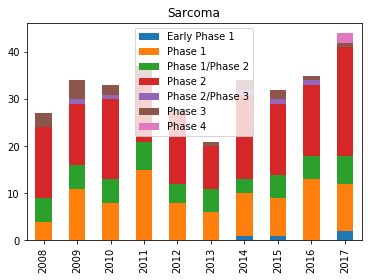

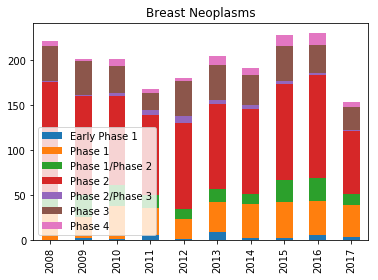

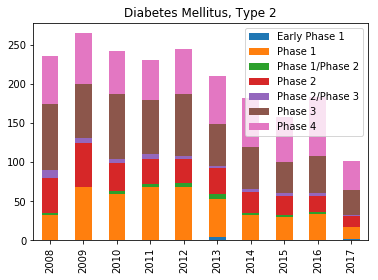

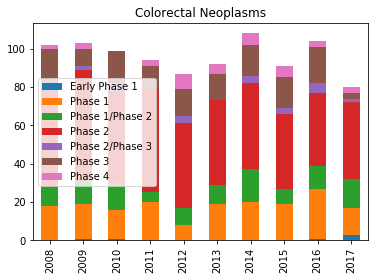

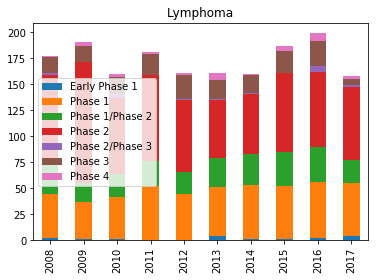

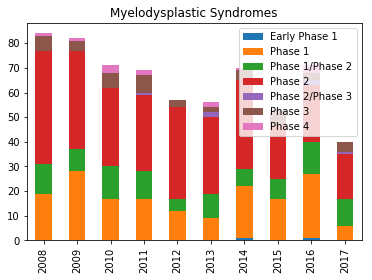

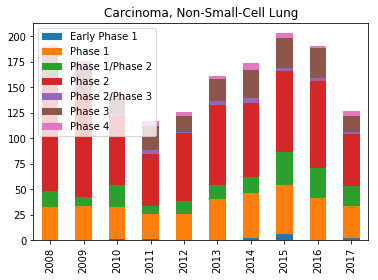

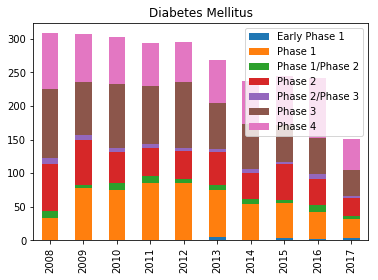

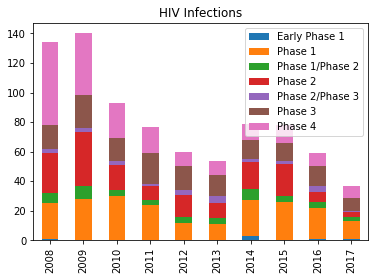

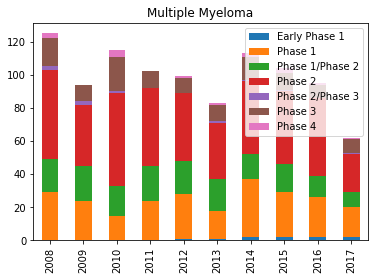

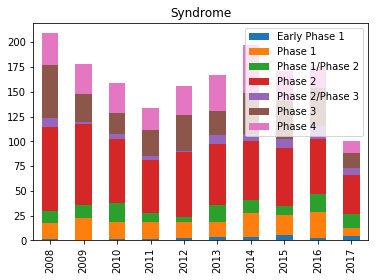

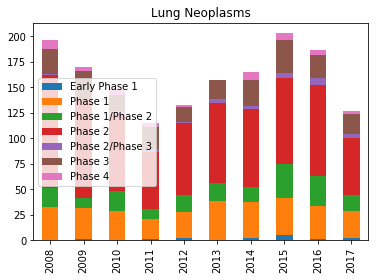

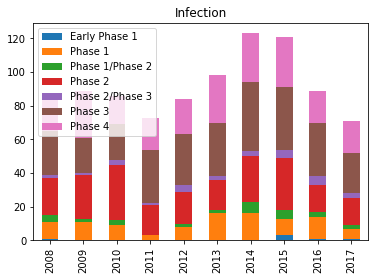

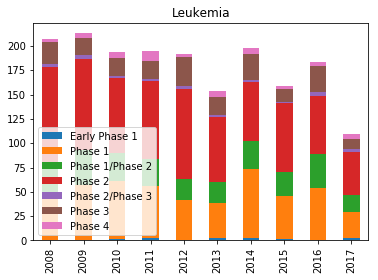

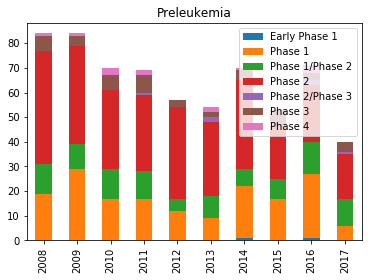

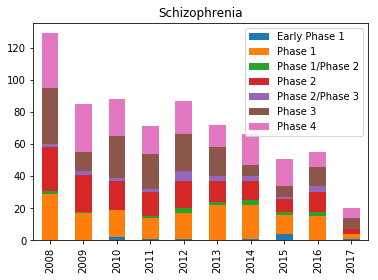

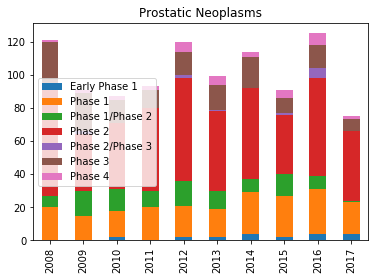

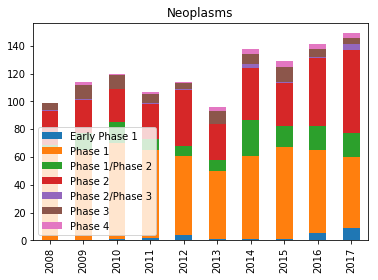

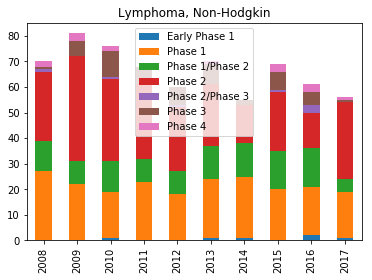

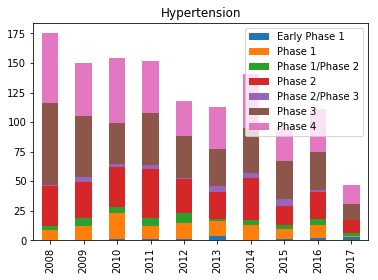

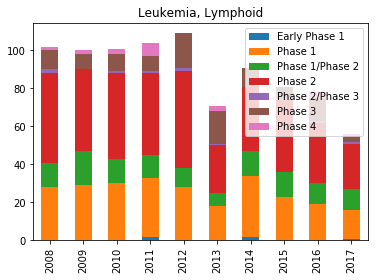

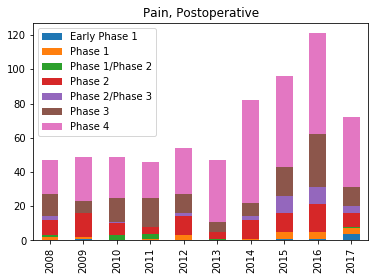

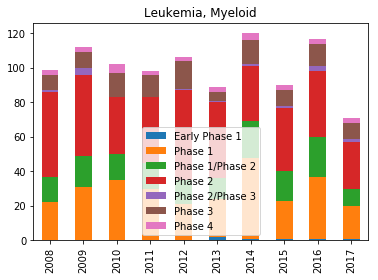

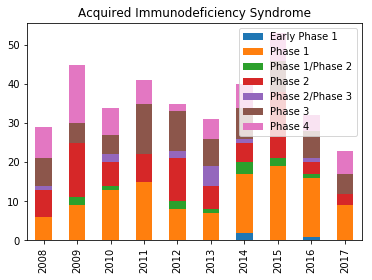

In [189]:
for cond in popular_conditions :

    trials = drugtrials[drugtrials[cond]]
    trials_by_year = trials.groupby('firstreceived_date') 


    a=trials_by_year.phase.value_counts()

    tmp= dict()

    for year in range(2008, 2018) :
        tmp[year] = a[year]

    pd.DataFrame(tmp).T.plot.bar(stacked=True, title = cond )
